In [14]:
import pandas as pd
%matplotlib inline
happiness2015 = pd.read_csv("World_Happiness_2015.csv")

mapping = {'Economy (GDP per Capita)': 'Economy', 'Health (Life Expectancy)': 'Health', 'Trust (Government Corruption)': 'Trust' }

happiness2015 = happiness2015.rename(mapping, axis = 1) 

In [15]:
def label(element):
    if element > 1:
        return 'High'
    else:
        return 'Low'
    
economy_impact_map = happiness2015['Economy'].map(label)
economy_impact_apply = happiness2015['Economy'].apply(label)
equal = economy_impact_map.equals(economy_impact_apply)

In [16]:
economy_apply = happiness2015['Economy'].apply(label)
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity']
factors_impact = happiness2015[factors].applymap(label)

In [17]:
def v_counts(col):
    num = col.value_counts()
    den = col.size
    return num/den
v_counts_pct = factors_impact.apply(v_counts)

In [18]:
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']
def percentages(col):
    div = col/happiness2015['Happiness Score'] 
    return div * 100
factor_percentages = happiness2015[factors].apply(percentages)

In [19]:
main_cols = ['Country', 'Region', 'Happiness Rank', 'Happiness Score']
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']
melt = pd.melt(happiness2015, id_vars = main_cols, value_vars = factors)
melt['Percentage'] = round(melt['value']/melt['Happiness Score'] * 100, 2)

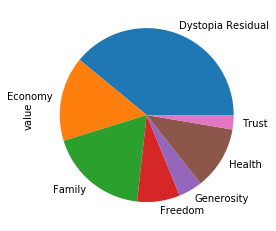

In [20]:
pv_melt = melt.pivot_table(index='variable', values='value')
pv_melt.plot(kind='pie', y='value', legend=False)